In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import requests

from mpl_toolkits.mplot3d import Axes3D

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [2]:
df_man = pd.read_csv('manhattan.csv')

In [3]:
df_br = pd.read_csv('brooklyn.csv')

In [4]:
df_qu = pd.read_csv('queens.csv')

In [5]:
df_man.head()

,rental_id,rent,bedrooms,bathrooms,size_sqft,min_to_subway,floor,building_age_yrs,no_fee,has_roofdeck,has_washer_dryer,has_doorman,has_elevator,has_dishwasher,has_patio,has_gym,neighborhood,borough
0,1545,2550,0.0,1,480,9,2.0,17,1,1,0,0,1,1,0,1,Upper East Side,Manhattan
1,2472,11500,2.0,2,2000,4,1.0,96,0,0,0,0,0,0,0,0,Greenwich Village,Manhattan
2,2919,4500,1.0,1,916,2,51.0,29,0,1,0,1,1,1,0,0,Midtown,Manhattan
3,2790,4795,1.0,1,975,3,8.0,31,0,0,0,1,1,1,0,1,Greenwich Village,Manhattan
4,3946,17500,2.0,2,4800,3,4.0,136,0,0,0,1,1,1,0,1,Soho,Manhattan


In [6]:
df_br.head()

,rental_id,rent,bedrooms,bathrooms,size_sqft,min_to_subway,floor,building_age_yrs,no_fee,has_roofdeck,has_washer_dryer,has_doorman,has_elevator,has_dishwasher,has_patio,has_gym,neighborhood,borough
0,2869,3600,3.0,2,900,4,1.0,15,1,0,0,0,0,0,0,0,Williamsburg,Brooklyn
1,4318,3900,3.0,2,1000,4,9.0,8,0,0,0,0,1,0,0,0,Greenwood,Brooklyn
2,6265,2700,2.0,1,900,4,2.0,96,0,0,0,0,0,0,0,0,Gowanus,Brooklyn
3,24,4900,1.0,1,1216,6,3.0,88,0,0,0,0,0,0,0,0,Brooklyn Heights,Brooklyn
4,9481,3900,0.0,1,1100,3,4.0,85,1,0,0,0,0,0,0,0,Williamsburg,Brooklyn


In [7]:
df_qu.head()

,rental_id,rent,bedrooms,bathrooms,size_sqft,min_to_subway,floor,building_age_yrs,no_fee,has_roofdeck,has_washer_dryer,has_doorman,has_elevator,has_dishwasher,has_patio,has_gym,neighborhood,borough
0,10234,3000,3.0,1,1000,4,1.0,106,0,0,0,0,0,0,0,0,Astoria,Queens
1,10524,1950,1.0,1,950,1,3.0,83,0,0,0,0,0,0,0,0,Forest Hills,Queens
2,5465,3500,1.0,1,996,9,7.0,3,1,0,0,0,0,0,0,0,Astoria,Queens
3,5259,1725,1.0,1,800,1,2.0,89,0,0,0,0,0,0,0,0,Astoria,Queens
4,9736,1700,1.0,1,730,10,3.0,7,0,0,0,0,0,0,0,0,Briarwood,Queens


In [8]:
df = df_man.copy()

In [9]:
x = df[['size_sqft','building_age_yrs']]
y = df[['rent']]

In [10]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.8, test_size = 0.2, random_state=6)

In [11]:
ols = LinearRegression()

ols.fit(x_train, y_train)

LinearRegression()

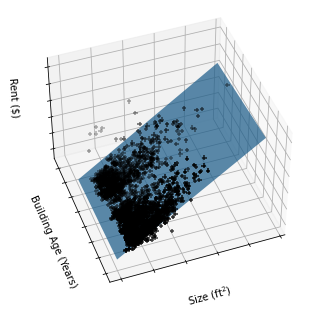

In [12]:
# Plot the figure

fig = plt.figure(1, figsize=(6, 4))
plt.clf()

elev = 43.5
azim = -110

ax = Axes3D(fig, elev=elev, azim=azim)

ax.scatter(x_train[['size_sqft']], x_train[['building_age_yrs']], y_train, c='k', marker='+')

ax.plot_surface(np.array([[0, 0], [4500, 4500]]), np.array([[0, 140], [0, 140]]), ols.predict(np.array([[0, 0, 4500, 4500], [0, 140, 0, 140]]).T).reshape((2, 2)), alpha=.7)

ax.set_xlabel('Size (ft$^2$)')
ax.set_ylabel('Building Age (Years)')
ax.set_zlabel('Rent ($)')

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])

# Add the code below:
plt.show()